In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
from citipy import citipy
import requests
from datetime import datetime
import time

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

34.25880273432713 39.0574519985893
-89.74929779641316 -136.9483123544199
53.15965155630951 173.69108037639967
-84.28459926867737 -14.379076629821327
-47.34090624165632 139.33802028216712
-38.06707247543108 -55.92440132682867
-43.34739239979382 -140.3494013696926
-13.855195483769677 -14.991445498145822
-69.18191955247653 172.3758622757373
53.50133131414265 149.97040117974154
-77.80732599033095 -68.01757278880986
50.48429383897371 56.528745416793754
-22.92288258256994 -124.74353278748475
-19.691449534109523 121.9676576027702
-23.740826768639167 102.21269937032946
-11.463090034938688 -142.73398105972507
33.125961847437594 121.98396641669592
-80.26566474232536 -48.69198424116877
54.99246877873236 -92.85354171603049
-27.083004326850606 21.893793455614343
46.882299968615484 13.58824399516925
-22.275082333970346 -18.922532987594053
61.681194912010966 30.26173891016782
-58.11954087255312 3.3895417237914103
-63.64138381690542 41.29568829390695
-1.092480779132842 -39.92699723333689
78.2540543165

-20.995509335944675 95.98174059669645
-8.648634590230145 -46.939476257949394
-49.12822463408528 -33.87993003589773
-64.93888067455744 142.22960769193304
75.46133795867007 -147.84744025040564
-77.40149947796668 -144.62533027221312
-16.336340634193903 -20.216521067718958
88.50510591047541 -55.72328287578027
-41.264162094710876 60.678581986883586
75.01744022772743 -59.18803943045252
-79.95616115210719 7.3450189204053515
51.140313694739234 -163.69763689788076
2.993120507504372 6.2941352835101725
11.255864271695387 -53.89245669959564
86.34733855412603 29.386001556988333
2.669045485838552 160.03859758346857
71.41093885693616 -61.84750984107737
-6.051808804844754 -25.95727380627588
-81.8403784822934 -123.30078663496434
-47.99178860256392 -57.260904765877925
4.510046296496611 171.26313974357282
24.23773399078776 141.96876180035247
-23.368723071928642 78.71971807707831
27.783136655525695 -155.51491246771286
27.243428476281736 127.37406113133852
11.384754455734239 175.30207234908573
-78.68332872

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu kamal
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | aqtobe
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | juegang
Processing Record 16 of Set 1 | sioux lookout
Processing Record 17 of Set 1 | tsabong
Processing Record 18 of Set 1 | seeboden
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | lakhdenpokhya
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | acarau
Processing Record 23 of Set 1 | bar

City not found. Skipping...
Processing Record 36 of Set 4 | lugovoy
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | visby
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | wagar
Processing Record 41 of Set 4 | kyabram
Processing Record 42 of Set 4 | aksarka
Processing Record 43 of Set 4 | santa rosa
Processing Record 44 of Set 4 | gawler
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | labrea
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | labuhan
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | ler
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | svobod

Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | brownwood
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | port macquarie
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | longyan
Processing Record 32 of Set 8 | oranjestad
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | fare
Processing Record 37 of Set 8 | oparino
Processing Record 38 of Set 8 | kansanshi
Processing Record 39 of Set 8 | ojinaga
Processing Record 40 of Set 8 | riyadh
Processing Record 41 of Set 8 | kuche
City not found. Skipping...
Processing Record 42 of Set 8 | chuy
Processing Record 43 of Set 8 | puerto ayacucho
Processing Record 44 of Set 8 | athabasca
Processing Record 45 of Set 8 | yumen
Processing Record 46 of Set 8 | mon
Processing Record 47 of Set 8 | lindlar
Processing Record 48 of Set 8 | todos s

Processing Record 10 of Set 12 | morro bay
Processing Record 11 of Set 12 | bandar-e lengeh
Processing Record 12 of Set 12 | nanortalik
Processing Record 13 of Set 12 | gallup
Processing Record 14 of Set 12 | pisco
Processing Record 15 of Set 12 | henties bay
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | mondeville
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | ondjiva
Processing Record 20 of Set 12 | antalaha
Processing Record 21 of Set 12 | ardistan
City not found. Skipping...
Processing Record 22 of Set 12 | hong gai
Processing Record 23 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 24 of Set 12 | chenghai
Processing Record 25 of Set 12 | noyabrsk
Processing Record 26 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 27 of Set 12 | horsham
Processing Record 28 of Set 12 | ahipara
Processing Record 29 of Set 12 | luanda
Processing Record 30 of Set 12 | tabas
Processing Record 31 

In [8]:
len(city_data)

547

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abu Kamal,34.4506,40.9171,81.82,25,1,17.29,SY,2022-05-23 16:37:56
1,Rikitea,-23.1203,-134.9692,75.85,74,24,13.87,PF,2022-05-23 16:37:56
2,Nikolskoye,59.7035,30.7861,58.89,61,29,4.85,RU,2022-05-23 16:37:57
3,Cape Town,-33.9258,18.4232,62.28,82,0,9.22,ZA,2022-05-23 16:35:02
4,New Norfolk,-42.7826,147.0587,44.71,87,5,2.06,AU,2022-05-23 16:37:57
5,Mar Del Plata,-38.0023,-57.5575,60.82,73,0,5.75,AR,2022-05-23 16:37:57
6,Georgetown,5.4112,100.3354,84.13,93,20,0.00,MY,2022-05-23 16:37:58
7,Bluff,-46.6000,168.3333,52.81,78,88,25.88,NZ,2022-05-23 16:37:58
8,Vostok,46.4856,135.8833,46.83,89,92,5.82,RU,2022-05-23 16:37:58
9,Ushuaia,-54.8000,-68.3000,37.02,75,75,2.30,AR,2022-05-23 16:35:58


In [30]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abu Kamal,SY,2022-05-23 16:37:56,34.4506,40.9171,81.82,25,1,17.29
1,Rikitea,PF,2022-05-23 16:37:56,-23.1203,-134.9692,75.85,74,24,13.87
2,Nikolskoye,RU,2022-05-23 16:37:57,59.7035,30.7861,58.89,61,29,4.85
3,Cape Town,ZA,2022-05-23 16:35:02,-33.9258,18.4232,62.28,82,0,9.22
4,New Norfolk,AU,2022-05-23 16:37:57,-42.7826,147.0587,44.71,87,5,2.06


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

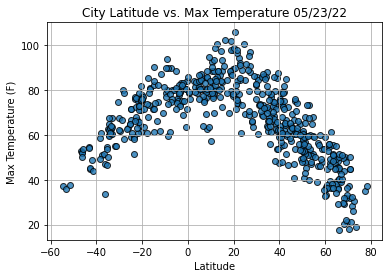

In [33]:
%matplotlib inline

# Import dependencies
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

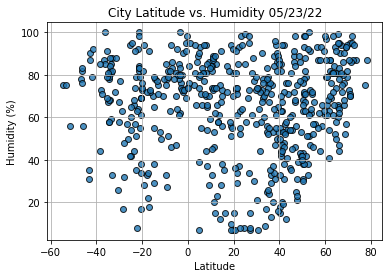

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Humidity_lat.png")

# Show plot.
plt.show()

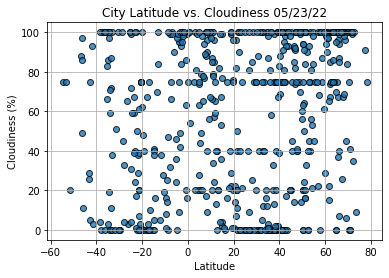

In [35]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Cloudiness_lat.png")

# Show plot.
plt.show()

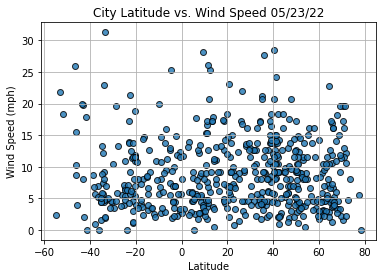

In [36]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/wind_lat.png")

# Show plot.
plt.show()

In [37]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
#Create Northern and Southern Hemisphere  DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.count()

City          391
Country       391
Date          391
Lat           391
Lng           391
Max Temp      391
Humidity      391
Cloudiness    391
Wind Speed    391
dtype: int64

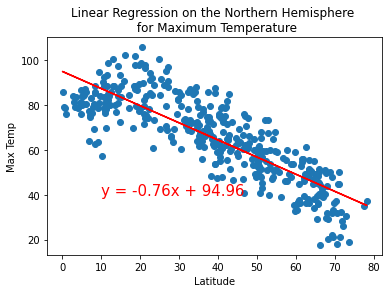

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

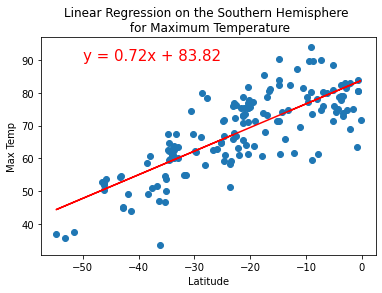

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

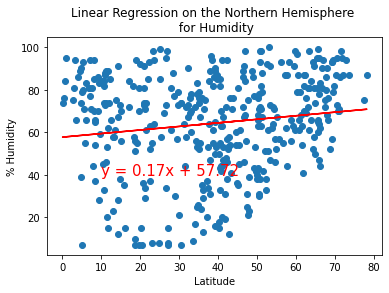

In [56]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', '% Humidity',(10,40))

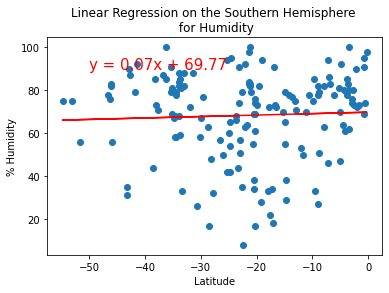

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity',(-50,90))

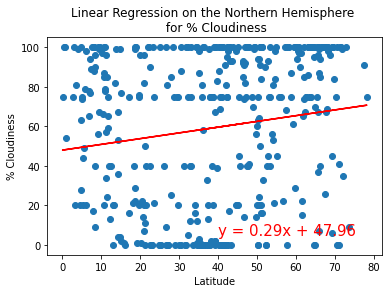

In [62]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,5))

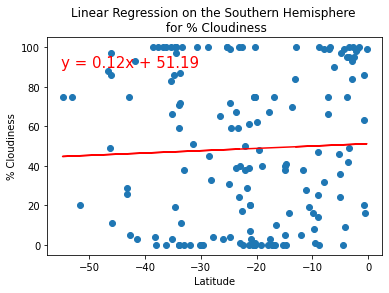

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,90))

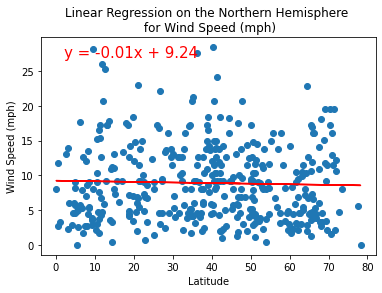

In [70]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)', 'Wind Speed (mph)',(2,27))

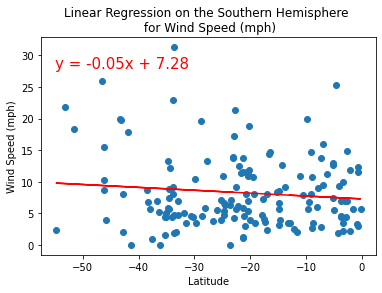

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)', 'Wind Speed (mph)',(-55,28))